In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import re 

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [5]:
# Path to dataset
path_file = "data/spotify_most_streamed_2024.zip"

# Open the dataset
with zipfile.ZipFile(path_file) as z:
    
    # List all files inside the ZIP file
    print(z.namelist())
    
    # Open the ZIP file
    with z.open ("Most Streamed Spotify Songs 2024.csv") as f:
        # songs_spofity=pd.read_csv(f, encoding = "unicode_escape")
        songs_spotify=pd.read_csv(f, encoding ="unicode_escape")

['Most Streamed Spotify Songs 2024.csv']


In [6]:
songs_spotify

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [7]:
songs_spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
Track Score,4600.0,41.844043,38.543766,19.4,23.3,29.9,44.425,725.4
Spotify Popularity,3796.0,63.501581,16.186438,1.0,61.0,67.0,73.000,96.0
Apple Music Playlist Count,4039.0,54.603120,71.612270,1.0,10.0,28.0,70.000,859.0
Deezer Playlist Count,3679.0,32.310954,54.274538,1.0,5.0,15.0,37.000,632.0
Amazon Playlist Count,3545.0,25.348942,25.989826,1.0,8.0,17.0,34.000,210.0
TIDAL Popularity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explicit Track,4600.0,0.358913,0.479734,0.0,0.0,0.0,1.000,1.0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [9]:
songs_spotify.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [10]:
songs_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [11]:
songs_spotify.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [12]:
def clean_column(name):
    # Convert to lower case
    name = name.lower()
    # remove special characters
    name = re.sub(r'[^a-z0-9\s]', '', name)
    # replace spaces with underscores
    name = re.sub(r'\s+', '_', name)
    return name

songs_spotify.columns = songs_spotify.columns.to_series().apply(clean_column)

In [13]:
songs_spotify.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [15]:
songs_spotify["artist"].value_counts().head(5)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [16]:
songs_spotify["explicit_track"].value_counts()

explicit_track
0    2949
1    1651
Name: count, dtype: int64

In [47]:
songs_clean = songs_spotify[songs_spotify["explicit_track"]==False]

In [51]:
clean_mounthed_artist=songs_clean["artist"].value_counts().head(5)

In [53]:
clean_mounthed_artist

artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [20]:
songs_spotify["spotify_streams"].value_counts()

spotify_streams
1,655,575,417    4
1,642,258,500    3
717,849,037      2
227,893,586      2
2,252,713,547    2
                ..
133,536,914      1
9,736,339        1
2,265,551,950    1
328,017,675      1
255,740,653      1
Name: count, Length: 4425, dtype: int64

In [21]:
songs_spotify["spotify_streams"].dtype
# The value type of the column is object

dtype('O')

In [22]:
# Covert the value of the column to float
songs_spotify["spotify_streams"]=songs_spotify["spotify_streams"].replace(',', '', regex=True).astype(float)

In [23]:
songs_spotify["spotify_streams"].dtype

dtype('float64')

In [24]:
# Group the Spotify streams by artist and sum their values
streamed_top = songs_spotify.groupby("artist")["spotify_streams"].sum()

In [55]:
# Sort in descending order and get the top 5
top_streamed_artist = streamed_top.sort_values(ascending=False).head(5)

In [57]:
top_streamed_artist

artist
Bad Bunny       3.705483e+10
The Weeknd      3.694854e+10
Drake           3.496216e+10
Taylor Swift    3.447077e+10
Post Malone     2.613747e+10
Name: spotify_streams, dtype: float64

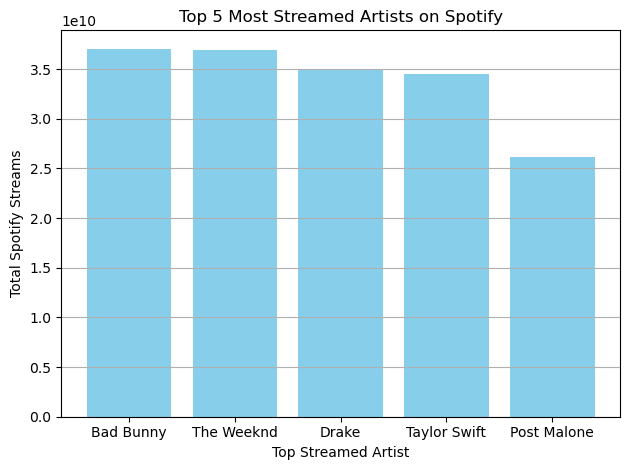

In [71]:
plt.bar(top_streamed_artist.index, top_streamed_artist, color='skyblue')
plt.xlabel("Top Streamed Artist")
plt.ylabel("Total Spotify Streams")
plt.title("Top 5 Most Streamed Artists on Spotify")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [85]:
songs_spotify["release_date"]

0       4/26/2024
1        5/4/2024
2       3/19/2024
3       1/12/2023
4       5/31/2024
          ...    
4595     9/5/2017
4596    7/27/2018
4597    2/28/2020
4598    11/8/2016
4599    4/11/2017
Name: release_date, Length: 4600, dtype: object

In [83]:
songs_spotify["release_date"].isna().sum()

0

In [77]:
songs_spotify["release_date"].dtype

dtype('O')

In [ ]:
songs_spotify["release_date"]

In [87]:
# Covert it to datetime format
songs_spotify["release_date"] = pd.to_datetime(songs_spotify["release_date"], errors="coerce")

In [89]:
songs_spotify["release_year"] = songs_spotify["release_date"].dt.year

In [91]:
songs_per_year = songs_spotify["release_year"].value_counts().sort_index()

In [93]:
songs_per_year

release_year
1987       1
1991       1
1994       1
1998       1
1999       1
2000       2
2001       1
2002       5
2003       3
2004       5
2005       5
2006       3
2007       5
2008      11
2009      15
2010      27
2011      51
2012      47
2013      55
2014      70
2015      96
2016     123
2017     213
2018     249
2019     296
2020     360
2021     408
2022     694
2023    1158
2024     693
Name: count, dtype: int64

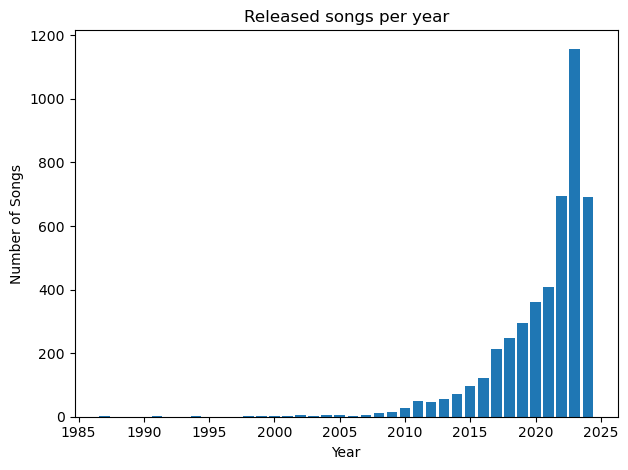

In [125]:
plt.bar(songs_per_year.index, songs_per_year)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Released songs per year")
plt.tight_layout()
plt.show()

In [103]:
songs_2024 = songs_spotify[songs_spotify["release_date"].dt.year == 2024]

In [105]:
last_song_2024 = songs_2024.loc[songs_2024["release_date"].idxmax()]

In [107]:
last_song_2024

track                                    The Door
album_name                               The Door
artist                                Teddy Swims
release_date                  2024-06-14 00:00:00
isrc                                 USWB12402486
all_time_rank                                  12
track_score                                 320.2
spotify_streams                       111155129.0
spotify_playlist_count                          2
spotify_playlist_reach                    263,767
spotify_popularity                            NaN
youtube_views                                 NaN
youtube_likes                                 NaN
tiktok_posts                                  NaN
tiktok_likes                                  NaN
tiktok_views                                  NaN
youtube_playlist_reach                        NaN
apple_music_playlist_count                    NaN
airplay_spins                                 NaN
siriusxm_spins                                NaN


The behaiviour of the plot for 2024 is due to the fact that the year in our dataset is not compalete. The relesed data fo last song for the year is 2024-06-14, whihc means that only half of the year is represneted in our dataset. In the trend continues, taking into account the song released in 2023, by hte end of the year, the number of the released songs maybe will double and will be more than 1000. Similar to the number of songs released in 2023.      

In [109]:
songs_spotify["release_month"] = songs_spotify["release_date"].dt.month_name()

In [111]:
songs_per_month = songs_spotify["release_month"].value_counts().sort_index()

In [113]:
songs_per_month

release_month
April        420
August       315
December     272
February     371
January      503
July         321
June         395
March        430
May          511
November     350
October      384
September    328
Name: count, dtype: int64

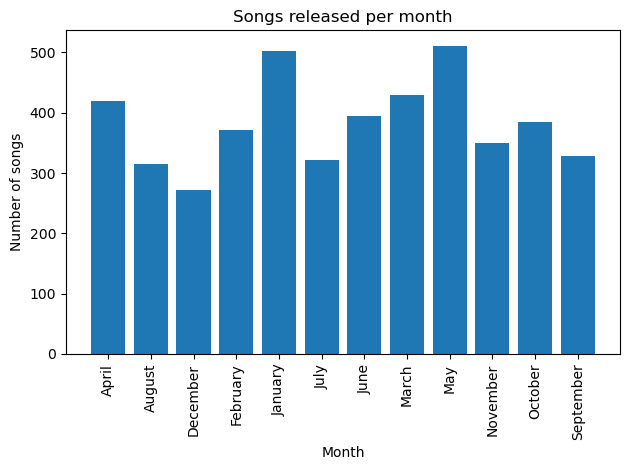

In [123]:
plt.bar(songs_per_month.index, songs_per_month)
plt.xlabel("Month")
plt.ylabel("Number of songs")
plt.title("Songs released per month")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The peaks in our barchart are in May(511) and January(503). We can interpret this as the fact the by the begging of each year there is a push to release a new songs. Also the peak at may can be atributed to the spring and summere festivals.April and March are the next higher months, which probally is related to the festival season (US,Glostonbary, etc)     

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

#### Part I

#### Part II

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.

#### Clean

In [31]:
# pd.set_option('display.max_rows', 1000)

In [129]:
songs_spotify[songs_spotify["track"].str.contains(r"[^a-zA-Z0-9\s\-\,.!?()]", na = False)].head(10)

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track,release_year,release_month
23,TEXAS HOLD 'EM,TEXAS HOLD 'EM,Beyoncï¿,2024-02-10,USSM12401302,24,278.9,4.267010e+08,"34,044","152,928,632",...,"40,725,482",177.0,"13,860,535","36,282",NaN,"2,100,708",NaN,1,2024,February
28,we can't be friends (wait for your love),eternal sunshine,Ariana Grande,2024-03-08,USUM72317276,29,262.8,5.910684e+08,"26,203","197,494,995",...,"22,062,193",126.0,"10,106,573","7,689","1,612,479","1,579,980",NaN,0,2024,March
29,Numb / Encore,Papercuts,JAY-Z,2024-04-12,USWB12400678,30,256.0,1.003216e+09,128,"485,454",...,NaN,NaN,"179,867,721","87,209",NaN,"4,474,248",NaN,1,2024,April
35,What's Love Got to Do with It - 2023 Remaster,What's Love Got to Do with It (30th Anniversar...,Tina Turner,2024-04-26,GBAYE2300351,36,230.0,4.794179e+08,7,"1,519",...,NaN,1.0,"121,250,721","83,632",NaN,"3,692,067",NaN,0,2024,April
41,Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...,Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...,sped up 8282,2023-04-08,KRA252300672,42,211.2,1.709706e+08,"27,827","5,784,546",...,"35,737",9.0,"270,610","3,170",NaN,NaN,NaN,1,2023,April
42,I'm Good (Blue),I'm Good (Blue),David Guetta,2022-08-26,UKWLG2200055,43,209.6,1.658229e+09,"262,248","239,957,538",...,"6,479,623",168.0,"139,926,990","31,235","8,007,236","10,973,120",NaN,1,2022,August
56,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2022-12-02,USUG12208791,57,192.3,1.337620e+09,"228,295","64,806,723",...,"2,134,791",66.0,"77,382,416","28,694",NaN,"6,205,060",NaN,1,2022,December
64,Back That Azz Up (feat. Lil Wayne & Mannie Fresh),400 Degreez (Deluxe Edition),JUVENILE,2024-03-29,USCM52400059,65,181.4,1.999298e+08,4,98,...,NaN,NaN,"390,345,308","399,793",NaN,NaN,NaN,1,2024,March
68,What Was I Made For? [From The Motion Picture ...,What Was I Made For? (From The Motion Picture ...,Billie Eilish,2023-07-13,USUM72307484,69,177.6,8.917202e+08,"114,560","97,542,546",...,"10,920,686",111.0,"39,374,594","19,921","5,418,596","4,476,509",NaN,0,2023,July
72,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,2023-01-11,UYB282301031,73,174.3,9.469415e+08,"100,130","74,836,321",...,"4,971,379",92.0,"48,806,666","10,225",NaN,"2,237,762",NaN,0,2023,January


In [ ]:
#problematic_rows = songs_spofity[songs_spofity['Track'].str.contains(r"[^a-zA-Z0-9\s\-\'.,!?()]", na=False)]

In [ ]:
pattern = r"[^a-zA-Z0-9\s\-\',.!?()&/:_]"

In [ ]:
problematic_rows = songs_spotify[songs_spotify['track'].str.contains(pattern, na=False, regex=True)]

In [ ]:
def extract_strange_chars(s):
    if pd.isna(s):
        return ''
    return ''.join(re.findall(pattern, s))

songs_spofity['strange_chars'] = songs_spofity['Track'].apply(extract_strange_chars)
songs_spofity[songs_spofity['strange_chars'] != ''][['Track', 'strange_chars']].head(10)

In [ ]:
problematic_rows_1 = songs_spofity[
    songs_spofity['Track'].str.contains(pattern, na=False) |
    songs_spofity['Album Name'].str.contains(pattern, na=False) |
    songs_spofity['Artist'].str.contains(pattern, na=False)]

In [ ]:
def try_recover(text):
    if pd.isna(text): return text
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text  # fallback if decoding fails

songs_spofity['Track_fixed'] = songs_spofity['Track'].apply(try_recover)
songs_spofity['Album_fixed'] = songs_spofity['Album Name'].apply(try_recover)

In [ ]:
import re

def clean_strange(text):
    if pd.isna(text): return text
    return re.sub(r"ï[^a-zA-Z0-9\s\[\]()\"']*", '', text)

songs_spofity['Track_clean'] = songs_spofity['Track'].apply(clean_strange)

In [ ]:
pattern = r"ï[^a-zA-Z0-9\s\[\]()\"']*" 

In [ ]:
problematic_rows_3 = songs_spofity[songs_spofity['Track_clean'].str.contains(pattern, na=False)]